# Filtrar curva utilizando savgol (scipy) y plotearla junto a la curva filtrada

In [1]:
import numpy as np
import pandas as pd
import lasio

from scipy.signal import savgol_filter

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter
from matplotlib.ticker import MaxNLocator

In [2]:
las = lasio.read(r'D:\Pablo\Python\working_files\Equinor\15_9-23.las')
well = las.df()
well['DEPTH'] = well.index
well = well.reindex(sorted(well.columns), axis=1)   # Ordenamos las columas alfabeticamente
pd.set_option('display.max_columns', 500)           # Para poder ver todas las columnas
well

,BS,CALI,DCAL,DEPTH,DEPTH_MD,DRHO,DTC,DTS,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,GR,NPHI,PEF,RDEP,RHOB,RMED,ROP,ROPA,X_LOC,Y_LOC,Z_LOC
DEPT,,,,,,,,,,,,,,,,,,,,,
110.000,NaN,NaN,NaN,110.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.342522,NaN,NaN,NaN
110.152,NaN,NaN,NaN,110.152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.720444,NaN,NaN,NaN
110.304,NaN,NaN,NaN,110.304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.098358,NaN,NaN,NaN
110.456,NaN,NaN,NaN,110.456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.476280,NaN,NaN,NaN
110.608,NaN,NaN,NaN,110.608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.854202,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224.328,8.5,NaN,NaN,3224.328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.749815,39.958431,NaN,NaN,NaN
3224.480,8.5,NaN,NaN,3224.480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.458361,37.414505,NaN,NaN,NaN
3224.632,8.5,NaN,NaN,3224.632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.287321,34.870579,NaN,NaN,NaN


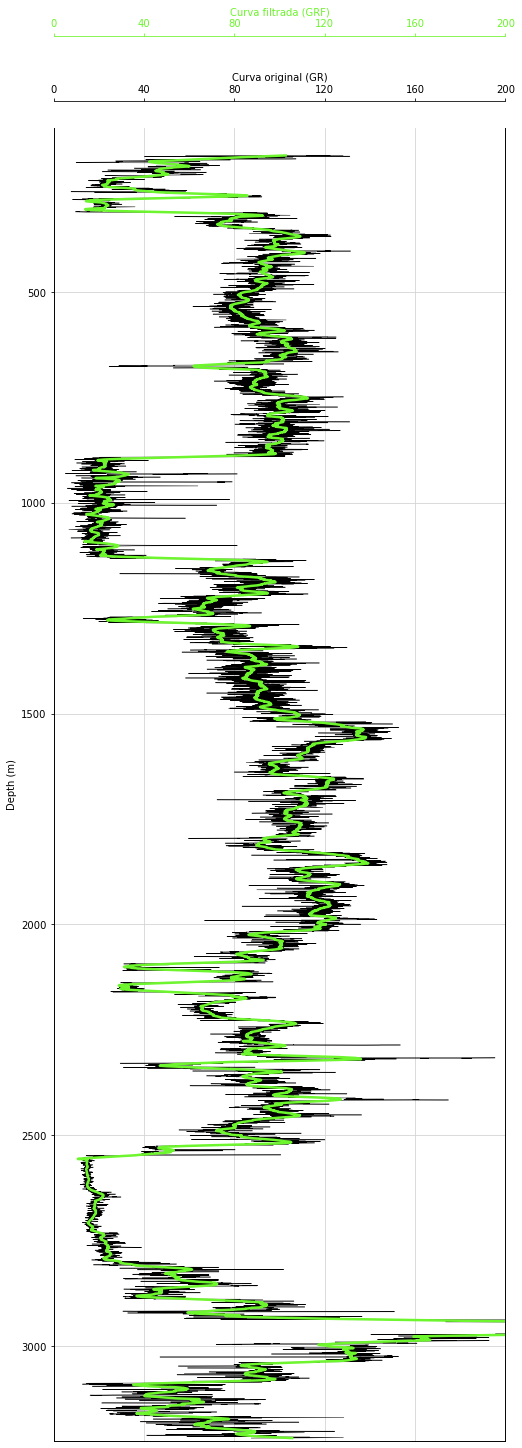

In [3]:
df_plot = well

####### CURVA A FILTRAR Y CURVA FILTRADA

crv_to_smooth = 'GR'
crv_smoothed = 'GRF'

crv_lim_izq = 0
crv_lim_der = 200


df_not_null = df_plot[df_plot[crv_to_smooth].notnull()]


##### PARAMETROS FILTRO SAVGOL (Savitzky-Golay) ###########

savgol_ws = 131  # 13 muestras por metro (131 = ~10 metros)
savgol_pol = 2   # grado del polinomio


# Para aplicar el filtro tengo que sacar los valores nulos del calculo
df_fil=pd.DataFrame(df_not_null[crv_to_smooth])
df_fil[crv_smoothed] = savgol_filter(df_not_null[crv_to_smooth], savgol_ws, savgol_pol)
df_plot[crv_smoothed]=df_fil[crv_smoothed]


#####################################
#               PLOT                #
#####################################

top_plot=las.well.STRT.value
bot_plot=las.well.STOP.value


ax1_ticks = 6         # Convencionales




fig, ax = plt.subplots(figsize=(40,20))#Set up the plot axes
   
ax1 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1) 
ax11 = ax1.twiny()


#########################################################################################
# CURVA ORIGINAL

ax1.plot(df_plot[crv_to_smooth], df_plot.index, color = "black", linewidth = 0.5)
ax1.set_ylabel("Depth (m)")

if abs(top_plot-bot_plot) > 5000:
    ax1.yaxis.set_major_locator(MaxNLocator(round(abs(top_plot-bot_plot)/999)))

elif abs(top_plot-bot_plot) > 2000 and abs(top_plot-bot_plot) <= 5000:
    ax1.yaxis.set_major_locator(MaxNLocator(round(abs(top_plot-bot_plot)/450)))

elif abs(top_plot-bot_plot) > 500 and abs(top_plot-bot_plot) <= 2000:
    ax1.yaxis.set_major_locator(MaxNLocator(round(abs(top_plot-bot_plot)/99)))
    
elif abs(top_plot-bot_plot) <= 500 and abs(top_plot-bot_plot) > 200:
    ax1.yaxis.set_major_locator(MaxNLocator(round(abs(top_plot-bot_plot)/49)))
else:
    ax1.yaxis.set_major_locator(MaxNLocator(round(abs(top_plot-bot_plot)/24)))
    
ax1.set_xlabel(f"Curva original ({crv_to_smooth})")
ax1.set_xlim(crv_lim_izq, crv_lim_der)
ax1.xaxis.label.set_color("black")
ax1.tick_params(axis='x', colors="black")
ax1.spines["top"].set_edgecolor("black")

if crv_lim_izq < crv_lim_der:
    ax1.set_xticks(np.arange(crv_lim_izq, crv_lim_der+1, (abs(crv_lim_izq-crv_lim_der)/(ax1_ticks-1))))
else:
    ax1.set_xticks(np.arange(crv_lim_der, crv_lim_izq+1, (abs(crv_lim_izq-crv_lim_der)/(ax1_ticks-1))))
    
ax1.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

################################################################################################################
# CURVA FILTRADA

ax11.plot(df_plot[crv_smoothed], df_plot.index, color = "#6DF52D", linewidth = 2.5)
ax11.set_xlabel(f"Curva filtrada ({crv_smoothed})")
ax11.xaxis.label.set_color("#6DF52D")
ax11.set_xlim(crv_lim_izq, crv_lim_der)
ax11.tick_params(axis='x', colors="#6DF52D")
ax11.spines["top"].set_position(("axes", 1.07))
ax11.spines["top"].set_visible(True)
ax11.spines["top"].set_edgecolor("#6DF52D")
ax11.title.set_color('#6DF52D')
if crv_lim_izq < crv_lim_der:
    ax11.set_xticks(np.arange(crv_lim_izq, crv_lim_der+1, (abs(crv_lim_izq-crv_lim_der)/(ax1_ticks-1))))
else:
    ax11.set_xticks(np.arange(crv_lim_der, crv_lim_izq+1, (abs(crv_lim_izq-crv_lim_der)/(ax1_ticks-1))))
    
ax11.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))

for ax in [ax1]:
    ax.set_ylim(bot_plot, top_plot)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))
    

plt.tight_layout()
plt.show()

In [11]:
dept_plot = 1750

well[(well.index > dept_plot) & (well.index < (dept_plot+100))]

,BS,CALI,DCAL,DEPTH,DEPTH_MD,DRHO,DTC,DTS,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,GR,NPHI,PEF,RDEP,RHOB,RMED,ROP,ROPA,X_LOC,Y_LOC,Z_LOC,GRF
DEPT,,,,,,,,,,,,,,,,,,,,,,
1750.080,12.250001,12.838901,0.588900,1750.080,1750.079956,0.082500,134.651093,311.128815,1.0,65000.0,93.956879,0.388356,6.184900,0.691273,2.132100,0.711697,228.575943,217.143066,433910.28125,6460000.0,-1725.013062,102.189251
1750.232,12.250001,12.806804,0.556802,1750.232,1750.232056,0.080453,134.680984,312.191803,1.0,65000.0,94.163780,0.397133,6.108789,0.692144,2.135668,0.710810,243.928528,215.935791,433910.28125,6460000.0,-1725.165161,102.143724
1750.384,12.250001,12.613100,0.363100,1750.384,1750.384033,0.068100,134.753159,312.421997,1.0,65000.0,95.017380,0.411779,5.647900,0.692829,2.157200,0.718513,254.319382,214.728500,433910.28125,6460000.0,-1725.317139,102.071541
1750.536,12.250001,12.661911,0.411911,1750.536,1750.536011,0.070372,135.893219,310.835449,1.0,65000.0,99.860283,0.434305,5.672972,0.705295,2.159444,0.734663,257.162750,213.521210,433910.28125,6460000.0,-1725.469116,102.060710
1750.688,12.250001,12.955756,0.705755,1750.688,1750.687988,0.084352,138.582657,306.576111,1.0,65000.0,103.538750,0.460200,5.828535,0.723225,2.174564,0.751124,246.003586,212.313919,433910.28125,6460000.0,-1725.620972,102.108237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849.336,12.250001,12.285027,0.035026,1849.336,1849.336060,0.052551,135.362671,331.783142,1.0,65000.0,144.815033,0.415728,4.451053,0.682346,2.263736,0.701329,107.554398,67.459435,433912.53125,6459999.5,-1824.242065,135.435437
1849.488,12.250001,12.340493,0.090493,1849.488,1849.488037,0.043701,135.949646,334.683044,1.0,65000.0,143.719543,0.409461,4.201978,0.686193,2.253745,0.704536,103.150757,72.764091,433912.53125,6459999.5,-1824.394043,135.732664
1849.640,12.250001,12.402818,0.152817,1849.640,1849.640015,0.038599,135.684433,337.663696,1.0,65000.0,141.517670,0.412207,4.099511,0.695347,2.246563,0.712896,92.073853,78.068741,433912.53125,6459999.5,-1824.546021,136.006840
